### Load Data

In [38]:
import pandas as pd
import numpy as np
import os
import joblib

In [39]:
DATA_FINAL_DIR = 'data/'

In [40]:
data = pd.read_csv(os.path.join(DATA_FINAL_DIR, 'class_quiz_tugas_nilai.csv'))

In [41]:
data

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran
0,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.800000,2.0,100.0,1.0,1.0
1,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.850000,2.0,100.0,2.0,1.0
2,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.950000,2.0,100.0,2.0,1.0
3,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.700000,2.0,100.0,2.0,1.0
4,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.950000,2.0,100.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,15.0,0.0,0.290323,1.0,0.0,0.0,1.0
13284,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.468750,1.0,0.0,0.0,1.0
13285,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.468750,1.0,0.0,0.0,1.0
13286,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.843750,1.0,0.0,0.0,1.0


In [42]:
# round 'total_score', 'total_task', and 'persentase_kehadiran'

data['total_score'] = data['total_score'].round(2)
data['total_task_score'] = data['total_task_score'] / 100
data['total_task_score'] = data['total_task_score'].round(2)
data['persentase_kehadiran'] = data['persentase_kehadiran'].round(2)

In [43]:
data

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran
0,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.80,2.0,1.0,1.0,1.0
1,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.85,2.0,1.0,2.0,1.0
2,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.95,2.0,1.0,2.0,1.0
3,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.70,2.0,1.0,2.0,1.0
4,PTN,1.0,2.0,0.0,1.0,0.0,W,0.0,G,16.0,0.0,0.95,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,15.0,0.0,0.29,1.0,0.0,0.0,1.0
13284,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.47,1.0,0.0,0.0,1.0
13285,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.47,1.0,0.0,0.0,1.0
13286,PTS,2.0,2.0,0.0,1.0,0.0,W,0.0,B,16.0,0.0,0.84,1.0,0.0,0.0,1.0


### Encoding

In [44]:
data['jenis'].value_counts()

PTS          5601
Kedinasan    3866
PTN          3821
Name: jenis, dtype: int64

In [45]:
map_jenis = {
    'PTS': 0,
    'PTN': 1,
    'Kedinasan': 2, 
}

data['jenis'] = data['jenis'].map(map_jenis)

In [46]:
data['wajibpilihan'].value_counts()

W    12747
P      541
Name: wajibpilihan, dtype: int64

In [47]:
map_wajibpilihan = {
    'W': 0,
    'P': 1,
}

data['wajibpilihan'] = data['wajibpilihan'].map(map_wajibpilihan)

In [48]:
data['akreditasi'].value_counts()

B    4317
U    3134
G    2644
A    1484
S    1399
C     185
M     125
Name: akreditasi, dtype: int64

In [49]:
# ordinal encoding column akreditasi using sklearn

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

data['akreditasi'] = encoder.fit_transform(data[['akreditasi']])
data['akreditasi'] = data['akreditasi'].astype(int)

joblib.dump(encoder, 'akreditasi_encoder.joblib')

['akreditasi_encoder.joblib']

In [50]:
data

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran
0,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.80,2.0,1.0,1.0,1.0
1,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.85,2.0,1.0,2.0,1.0
2,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0,1.0
3,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.70,2.0,1.0,2.0,1.0
4,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,15.0,0.0,0.29,1.0,0.0,0.0,1.0
13284,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0,1.0
13285,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0,1.0
13286,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.84,1.0,0.0,0.0,1.0


In [51]:
data.drop(columns=['persentase_kehadiran'], inplace=True)

In [52]:
data.to_csv(os.path.join(DATA_FINAL_DIR, 'train.csv'), index=False)

### Feature Engineering

In [53]:
data = pd.read_csv(os.path.join(DATA_FINAL_DIR, 'train.csv'))

In [54]:
data

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task
0,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.80,2.0,1.0,1.0
1,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.85,2.0,1.0,2.0
2,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0
3,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.70,2.0,1.0,2.0
4,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,15.0,0.0,0.29,1.0,0.0,0.0
13284,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0
13285,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0
13286,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.84,1.0,0.0,0.0


In [55]:
data['persentase_kehadiran'] = data['total_hadir'] / \
    (data['total_hadir'] + data['total_tidak_hadir'])
data['persentase_kehadiran'] = data['persentase_kehadiran'].round(2)

In [56]:
import pandas as pd
import numpy as np
from itertools import product

# Grid search bobot dengan langkah 0.1
weights = np.arange(0.1, 0.7, 0.05)
best_corr = -1
best_weights = (0, 0, 0)

result = []

for w1, w2, w3 in product(weights, repeat=3):
    if abs(w1 + w2 + w3 - 1.0) < 1e-6:  # pastikan jumlah bobot = 1
        data['combined_score'] = (
            w1 * data['total_score']+
            w2 * data['total_task_score'] +
            (w3 * data['persentase_kehadiran'])
        )

        corr = data['combined_score'].corr(data['islulus'])

        if corr > best_corr:
            best_corr = corr
            best_weights = (w1, w2, w3)
        
        result.append((w1, w2, w3, corr))

result_df = pd.DataFrame(result, columns=['w1', 'w2', 'w3', 'corr'])
result_df.sort_values(by='corr', ascending=False).head(20)

,w1,w2,w3,corr
30,0.25,0.10,0.65,0.191573
19,0.20,0.15,0.65,0.173960
42,0.30,0.10,0.60,0.169548
31,0.25,0.15,0.60,0.155661
9,0.15,0.20,0.65,0.150346
53,0.35,0.10,0.55,0.148000
43,0.30,0.15,0.55,0.137010
20,0.20,0.20,0.60,0.136001
63,0.40,0.10,0.50,0.127747
0,0.10,0.25,0.65,0.126156


In [57]:
best_weights = [0.25, 0.1, 0.65]

In [58]:
data['combined_score'] = (
    best_weights[0] * data['total_score'] +
    best_weights[1] * data['total_task_score'] +
    (best_weights[2] * data['persentase_kehadiran'])
)

In [59]:
data.to_csv(os.path.join(DATA_FINAL_DIR, 'train_feature.csv'), index=False)

### Feature Selection

<AxesSubplot: >

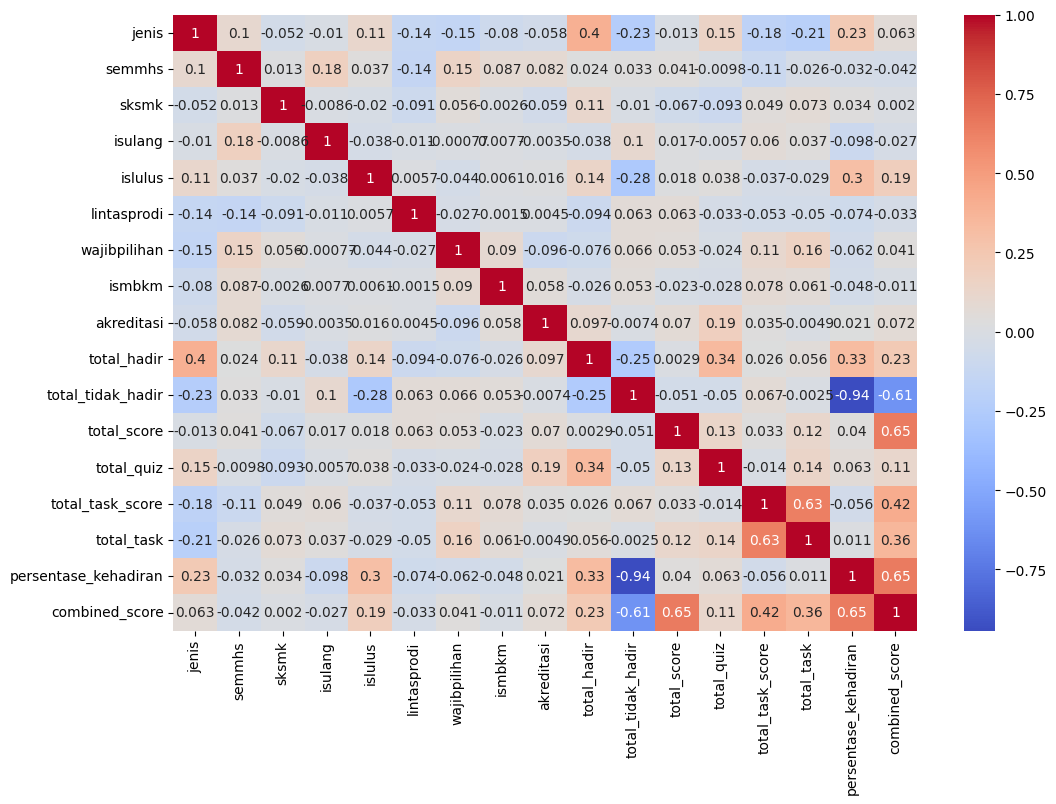

In [60]:
# create correlation matrix using sns.heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [61]:
corr

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran,combined_score
jenis,1.000000,0.100084,-0.051696,-0.010012,0.112504,-0.136133,-0.150859,-0.080355,-0.057783,0.399075,-0.234574,-0.012551,0.148254,-0.181356,-0.209886,0.231229,0.062824
semmhs,0.100084,1.000000,0.013229,0.175589,0.036739,-0.141399,0.145871,0.087166,0.081604,0.024415,0.032557,0.041329,-0.009820,-0.106515,-0.026112,-0.032475,-0.042344
sksmk,-0.051696,0.013229,1.000000,-0.008611,-0.020325,-0.091466,0.055830,-0.002608,-0.059438,0.114242,-0.010311,-0.067239,-0.093134,0.048719,0.073215,0.033627,0.002043
isulang,-0.010012,0.175589,-0.008611,1.000000,-0.038320,-0.010696,-0.000775,0.007703,-0.003467,-0.038466,0.104166,0.016607,-0.005747,0.059954,0.037075,-0.097938,-0.027088
islulus,0.112504,0.036739,-0.020325,-0.038320,1.000000,0.005676,-0.043803,0.006132,0.016091,0.140853,-0.275086,0.018431,0.038458,-0.036802,-0.028751,0.303386,0.191573
lintasprodi,-0.136133,-0.141399,-0.091466,-0.010696,0.005676,1.000000,-0.027037,-0.001477,0.004500,-0.093629,0.062682,0.062624,-0.032617,-0.053473,-0.049661,-0.074434,-0.033352
wajibpilihan,-0.150859,0.145871,0.055830,-0.000775,-0.043803,-0.027037,1.000000,0.090224,-0.096403,-0.076490,0.065794,0.053003,-0.024017,0.111491,0.158034,-0.061638,0.041120
ismbkm,-0.080355,0.087166,-0.002608,0.007703,0.006132,-0.001477,0.090224,1.000000,0.057734,-0.026276,0.052632,-0.022936,-0.027890,0.077568,0.060502,-0.048449,-0.011471
akreditasi,-0.057783,0.081604,-0.059438,-0.003467,0.016091,0.004500,-0.096403,0.057734,1.000000,0.097312,-0.007428,0.069623,0.187153,0.035448,-0.004890,0.021051,0.071573
total_hadir,0.399075,0.024415,0.114242,-0.038466,0.140853,-0.093629,-0.076490,-0.026276,0.097312,1.000000,-0.254446,0.002942,0.338093,0.025844,0.056012,0.329306,0.226270


In [62]:
# sort correlation to islulus column from each column

corr['islulus'].sort_values(ascending=False)


islulus                 1.000000
persentase_kehadiran    0.303386
combined_score          0.191573
total_hadir             0.140853
jenis                   0.112504
total_quiz              0.038458
semmhs                  0.036739
total_score             0.018431
akreditasi              0.016091
ismbkm                  0.006132
lintasprodi             0.005676
sksmk                  -0.020325
total_task             -0.028751
total_task_score       -0.036802
isulang                -0.038320
wajibpilihan           -0.043803
total_tidak_hadir      -0.275086
Name: islulus, dtype: float64

In [63]:
data.drop(columns=['ismbkm', 'lintasprodi'], inplace=True)
data.to_csv(os.path.join(DATA_FINAL_DIR, 'train_feature.csv'), index=False)

KeyboardInterrupt: 

## Clean Data

In [ ]:
train = pd.read_csv(os.path.join(DATA_FINAL_DIR, 'train.csv'))
train_feature = pd.read_csv(os.path.join(DATA_FINAL_DIR, 'train_feature.csv'))

In [ ]:
train

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task
0,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.80,2.0,1.0,1.0
1,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.85,2.0,1.0,2.0
2,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0
3,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.70,2.0,1.0,2.0
4,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,15.0,0.0,0.29,1.0,0.0,0.0
13284,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0
13285,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.47,1.0,0.0,0.0
13286,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.84,1.0,0.0,0.0


In [ ]:
train_feature

,jenis,semmhs,sksmk,isulang,islulus,wajibpilihan,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran,combined_score
0,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.80,2.0,1.0,1.0,1.0,0.9500
1,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.85,2.0,1.0,2.0,1.0,0.9625
2,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.95,2.0,1.0,2.0,1.0,0.9875
3,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.70,2.0,1.0,2.0,1.0,0.9250
4,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.95,2.0,1.0,2.0,1.0,0.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0,2.0,2.0,0.0,1.0,0,1,15.0,0.0,0.29,1.0,0.0,0.0,1.0,0.7225
13284,0,2.0,2.0,0.0,1.0,0,1,16.0,0.0,0.47,1.0,0.0,0.0,1.0,0.7675
13285,0,2.0,2.0,0.0,1.0,0,1,16.0,0.0,0.47,1.0,0.0,0.0,1.0,0.7675
13286,0,2.0,2.0,0.0,1.0,0,1,16.0,0.0,0.84,1.0,0.0,0.0,1.0,0.8600


In [ ]:
# remove rows where total_quiz and total_task 1 of them is 0
train_clean = train[
    (train_feature['total_quiz'] != 0) & 
    (train_feature['total_task'] != 0)
]

train_clean

,jenis,semmhs,sksmk,isulang,islulus,lintasprodi,wajibpilihan,ismbkm,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task
0,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.80,2.0,1.00,1.0
1,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.85,2.0,1.00,2.0
2,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.00,2.0
3,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.70,2.0,1.00,2.0
4,1,1.0,2.0,0.0,1.0,0.0,0,0.0,3,16.0,0.0,0.95,2.0,1.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13239,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.71,2.0,0.80,1.0
13244,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,16.0,0.0,0.52,2.0,0.85,1.0
13245,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,14.0,0.0,0.31,2.0,0.85,1.0
13248,0,2.0,2.0,0.0,1.0,0.0,0,0.0,1,15.0,0.0,0.61,2.0,0.80,1.0


In [ ]:
train_clean['islulus'].value_counts()

1.0    5112
0.0     172
Name: islulus, dtype: int64

In [ ]:
train_feature_clean = train_feature[
    (train_feature['total_quiz'] != 0) & 
    (train_feature['total_task'] != 0)
]
train_feature_clean

,jenis,semmhs,sksmk,isulang,islulus,wajibpilihan,akreditasi,total_hadir,total_tidak_hadir,total_score,total_quiz,total_task_score,total_task,persentase_kehadiran,combined_score
0,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.80,2.0,1.00,1.0,1.00,0.9500
1,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.85,2.0,1.00,2.0,1.00,0.9625
2,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.95,2.0,1.00,2.0,1.00,0.9875
3,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.70,2.0,1.00,2.0,1.00,0.9250
4,1,1.0,2.0,0.0,1.0,0,3,16.0,0.0,0.95,2.0,1.00,2.0,1.00,0.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13239,0,2.0,2.0,0.0,1.0,0,1,16.0,0.0,0.71,2.0,0.80,1.0,1.00,0.9075
13244,0,2.0,2.0,0.0,1.0,0,1,16.0,0.0,0.52,2.0,0.85,1.0,1.00,0.8650
13245,0,2.0,2.0,0.0,1.0,0,1,14.0,0.0,0.31,2.0,0.85,1.0,1.00,0.8125
13248,0,2.0,2.0,0.0,1.0,0,1,15.0,0.0,0.61,2.0,0.80,1.0,1.00,0.8825


In [ ]:
train_feature_clean['islulus'].value_counts()

1.0    5112
0.0     172
Name: islulus, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from itertools import product

# Grid search bobot dengan langkah 0.1
weights = np.arange(0.1, 0.7, 0.05)
best_corr = -1
best_weights = (0, 0, 0)

result = []

for w1, w2, w3 in product(weights, repeat=3):
    if abs(w1 + w2 + w3 - 1.0) < 1e-6:  # pastikan jumlah bobot = 1
        train_feature_clean['combined_score'] = (
            w1 * train_feature_clean['total_score'] +
            w2 * train_feature_clean['total_task_score'] +
            (w3 * train_feature_clean['persentase_kehadiran'])
        )

        corr = train_feature_clean['combined_score'].corr(train_feature_clean['islulus'])

        if corr > best_corr:
            best_corr = corr
            best_weights = (w1, w2, w3)

        result.append((w1, w2, w3, corr))

result_df = pd.DataFrame(result, columns=['w1', 'w2', 'w3', 'corr'])
result_df.sort_values(by='corr', ascending=False).head(20)

C:\Users\KEY\AppData\Local\Temp\ipykernel_25748\1123460018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature_clean['combined_score'] = (


,w1,w2,w3,corr
0,0.10,0.25,0.65,0.266698
1,0.10,0.30,0.60,0.253432
9,0.15,0.20,0.65,0.252944
10,0.15,0.25,0.60,0.240559
2,0.10,0.35,0.55,0.237966
19,0.20,0.15,0.65,0.235066
11,0.15,0.30,0.55,0.226101
20,0.20,0.20,0.60,0.223458
3,0.10,0.40,0.50,0.220537
30,0.25,0.10,0.65,0.215031


In [ ]:
best_weights = [0.1, 0.25, 0.65]

In [ ]:
train_feature_clean['combined_score'] = (
    best_weights[0] * train_feature_clean['total_score'] +
    best_weights[1] * train_feature_clean['total_task_score'] +
    (best_weights[2] * train_feature_clean['persentase_kehadiran'])
)

C:\Users\KEY\AppData\Local\Temp\ipykernel_25748\1955273721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature_clean['combined_score'] = (


In [ ]:
train_feature_clean.to_csv(os.path.join(DATA_FINAL_DIR, 'train_clean_feature.csv'), index=False)
train_clean.to_csv(os.path.join(DATA_FINAL_DIR, 'train_clean.csv'), index=False)